In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
liana = pd.read_csv('processed_data/03-LR_network_visualisation/03k_LIANA_DLPFC/LIANA_outputs_DLPFC.csv') # Supplementary table 4 from Huuki-Myers et al, bioRxiv, 2023

0.1
(1210, 1)
(2740, 16)


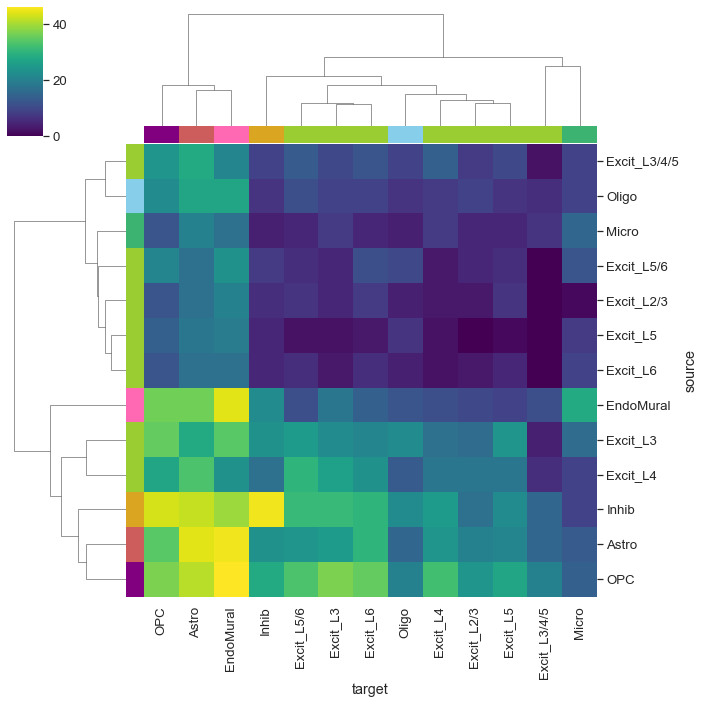

0.55
(536, 1)
(963, 16)


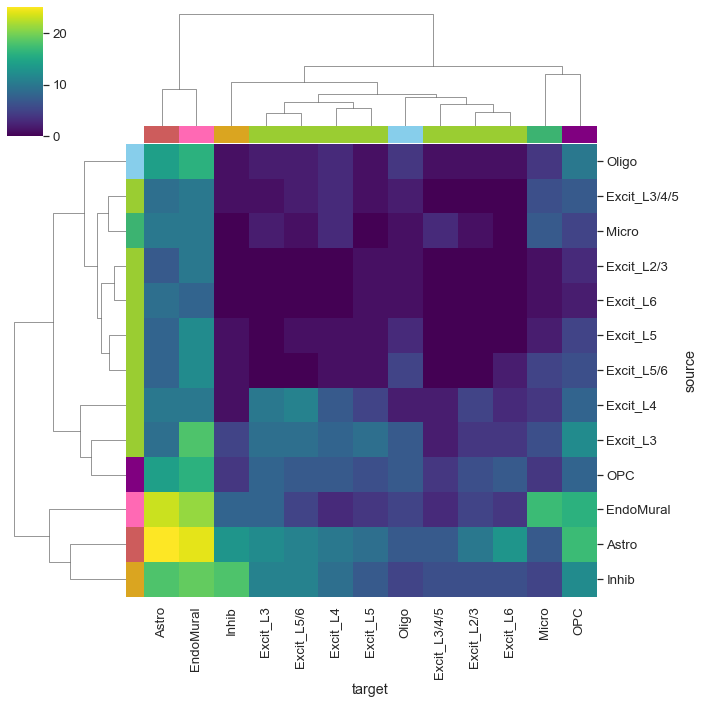

0.4
(865, 1)
(2263, 16)


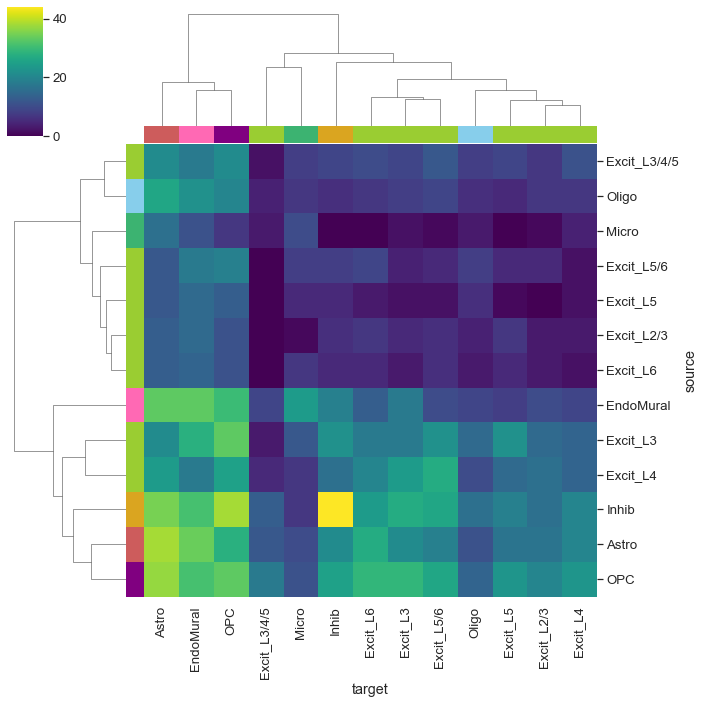

0.7
(128, 1)
(272, 16)


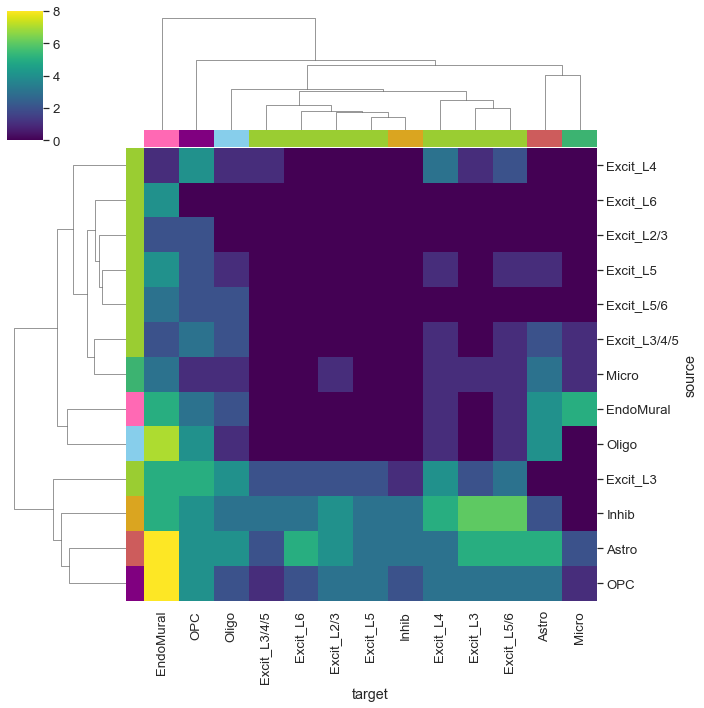

In [8]:



reslist = ['0.1', '0.55', '0.4', '0.7']
sns.set(font_scale = 1.2)
for res in range(0,len(reslist)):
    print(reslist[res])
    top = pd.read_csv('processed_data/03-LR_network_visualisation/louvain_largest_cluster_%s.csv' % reslist[res], sep = ',', index_col = 0)
    print(np.shape(top))
    liana_subset = liana[(liana['receptor.complex'].isin(top['0'])) & (liana['ligand.complex'].isin(top['0']))]
    print(np.shape(liana_subset))
    df = pd.crosstab(liana_subset.source, liana_subset.target)
    lut = {'Micro': 'mediumseagreen', 
        'OPC': 'purple', 
        'Oligo': 'skyblue', 
        'Astro': 'indianred', 
        'EndoMural': 'hotpink', 
        'Excit_L2/3': 'yellowgreen',
       'Inhib': 'goldenrod', 
       'Excit_L3': 'yellowgreen', 
       'Excit_L3/4/5': 'yellowgreen', 
       'Excit_L5/6': 'yellowgreen', 
       'Excit_L4': 'yellowgreen',
       'Excit_L6': 'yellowgreen', 
       'Excit_L5': 'yellowgreen'}
    row_colors = df.columns.unique().map(lut)
    sns.clustermap(df, row_colors = row_colors, col_colors = row_colors, cmap = 'viridis')
    plt.savefig('plots/03-LR_network_visualisation/03k_LIANA_DLPFC/cellcell_comms_LIANA_snrnaseq_DLPFC_%s.png' % reslist[res], dpi = 300, bbox_inches = 'tight')
    plt.show()